<h1>ANEXO IV_c. Resultados de Análisis.<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Carga-de-módulos" data-toc-modified-id="Carga-de-módulos-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Carga de módulos</a></span></li><li><span><a href="#Carga-Librerías-y-resultados" data-toc-modified-id="Carga-Librerías-y-resultados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Carga Librerías y resultados</a></span></li><li><span><a href="#Scores-DataSets" data-toc-modified-id="Scores-DataSets-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Scores DataSets</a></span></li><li><span><a href="#Timer-DataSets" data-toc-modified-id="Timer-DataSets-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Timer DataSets</a></span></li><li><span><a href="#Ranking-DataSets" data-toc-modified-id="Ranking-DataSets-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Ranking DataSets</a></span></li><li><span><a href="#Conclusión" data-toc-modified-id="Conclusión-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Conclusión</a></span></li></ul></div>

# Carga de módulos

Se muestran a continuación las versiones tanto del OS usado así como de Python usados en el presente notebook.

In [1]:
!lsb_release -a

"lsb_release" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


In [2]:
!uname -r

2.10.0(0.325/5/3)


In [3]:
import os
import sys
print("Python version: {}". format(sys.version))

Python version: 3.6.8 |Anaconda, Inc.| (default, Feb 21 2019, 18:30:04) [MSC v.1916 64 bit (AMD64)]


# Carga Librerías y resultados

In [4]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

import json 

In [5]:
# Se muestran versiones usadas
print("Versiones usadas en el notebook")
print('Numpy {}.'.format(np.__version__))
print('Pandas {}.'.format(pd.__version__))
print('Matplotlib {}.'.format(matplotlib.__version__))
print('Seaborn {}.'.format(sns.__version__))

Versiones usadas en el notebook
Numpy 1.16.4.
Pandas 0.24.2.
Matplotlib 3.1.0.
Seaborn 0.9.0.


Se cargan los JSON generados como resultados de los modelos de Machine Learning en los dataset ejecutados resultado de la selección de variables por los métodos:

* **embedded (59 variables)**
* **wrapper (136 variables)**

In [6]:
path59 = "C:/Users/vigarcia/Desktop/Ames/new/score_timer_datos59.json"
path136 = "C:/Users/vigarcia/Desktop/Ames/new/score_timer_datos136.json"

In [7]:
with open(path59) as file:
    datos59 = json.load(file)
    
with open(path136) as file:
    datos136 = json.load(file)

Se almacenan los elementos del json en variables independientes

In [8]:
score59dict = datos59[0]
timer59dict = datos59[1]
rank59dict = datos59[2]

score136dict = datos136[0]
timer136dict = datos136[1]
rank136dict = datos136[2]

Se generan las columnas para

# Scores DataSets

Se genera dataframe con los datos de **score** de ambos data sets y se ordenan por la mediana.

In [9]:
scorecolumns59 = [key + "_59" for key in score59dict.keys()]
scorecolumns136 = [key + "_136" for key in score136dict.keys()]

scoreDF59 = pd.DataFrame(score59dict)
scoreDF59.columns = scorecolumns59

scoreDF136 = pd.DataFrame(score136dict)
scoreDF136.columns = scorecolumns136

rank = pd.concat([scoreDF59, scoreDF136], axis=1).median().sort_values().index
score = pd.concat([scoreDF59, scoreDF136], axis=1)[rank]

score.head()

,Ensemb4_59,Ensemb3_59,Ensemb2_59,Ensemb1_59,Elasticnet_59,Ridge_59,Stack3_59,Stack2_59,Stack1_59,SVRR_59,...,ExT_59,RF_59,Lars_136,ExT_136,RF_136,SGD_59,SGD_136,RANSAC_136,Huber_136,Huber_59
0,0.114085,0.114520,0.114236,0.115616,0.114344,0.114273,0.114881,0.114881,0.114084,0.119934,...,0.132623,0.129139,0.147673,0.132945,0.136583,0.178041,0.186461,1.502496e-01,0.270790,0.343754
1,0.104660,0.104069,0.104266,0.106179,0.103977,0.103966,0.104716,0.104716,0.103971,0.106724,...,0.137474,0.137059,0.120888,0.137422,0.139016,0.187698,0.203002,1.139337e-01,0.302334,0.276205
2,0.096723,0.098262,0.098154,0.099670,0.098625,0.098511,0.097797,0.097797,0.097781,0.098611,...,0.113240,0.109695,0.122928,0.115451,0.115560,0.184698,0.190590,1.443194e+09,0.280229,0.390384
3,0.118728,0.119445,0.119821,0.122874,0.118797,0.118817,0.118884,0.118884,0.119010,0.121280,...,0.138659,0.135518,0.135119,0.139146,0.141509,0.198650,0.204115,4.971601e+09,0.328250,0.468264
4,0.105422,0.106792,0.106889,0.108561,0.107533,0.107567,0.106978,0.106978,0.106680,0.110646,...,0.126291,0.136183,0.128312,0.126942,0.136717,0.198105,0.212505,1.220895e-01,0.299731,0.264752


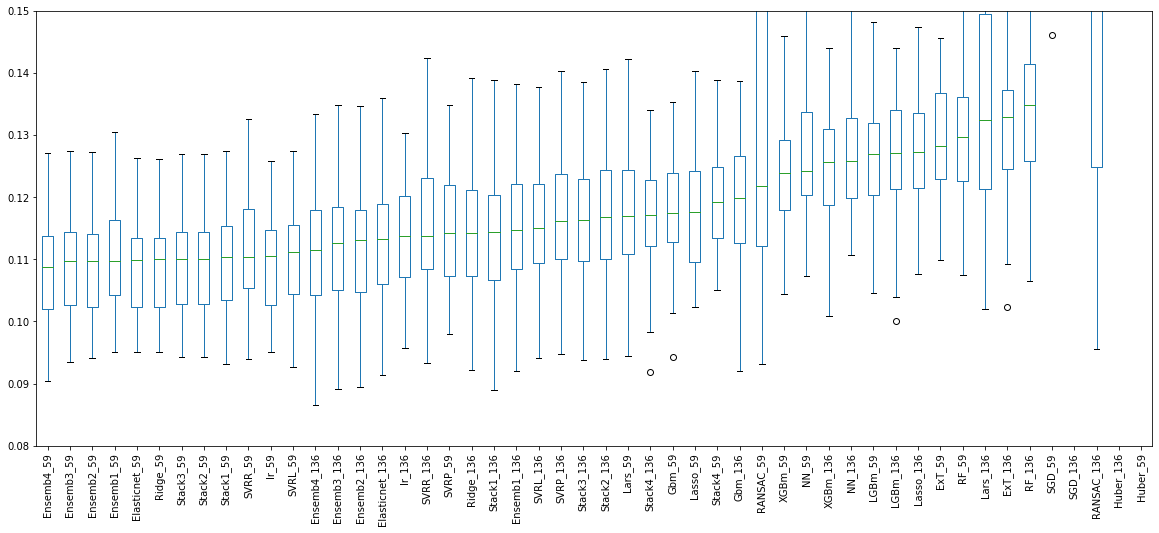

In [10]:
score.plot(kind="box", figsize=(20, 8), ylim=(0.08, 0.15));
plt.xticks(rotation=90);

# Timer DataSets

Se crean los dataframes de cada uno de los datasets y se funden en uno sólo.

In [11]:
timercolumns59 = [key + "_59" for key in timer59dict.keys()]
timercolumns136 = [key + "_136" for key in timer136dict.keys()]

timerDF59 = pd.DataFrame(timer59dict)
timerDF59.columns = timercolumns59

timerDF136 = pd.DataFrame(timer136dict)
timerDF136.columns = timercolumns136

timerDF59 = timerDF59.T[['mean_fit_time',
                         'mean_score_time',
                         'refit_best_model',
                         'mean_predict_train_time',
                         'mean_predict_test_time',
                         'mean_pred_score_train_time']]

timerDF136 = timerDF136.T[['mean_fit_time',
                         'mean_score_time',
                         'refit_best_model',
                         'mean_predict_train_time',
                         'mean_predict_test_time',
                         'mean_pred_score_train_time']]

timerDF = pd.concat([timerDF59, timerDF136])

Sobre el dataframe creado, se generan los gráficos de tiempo ordenados según el campo determinado.

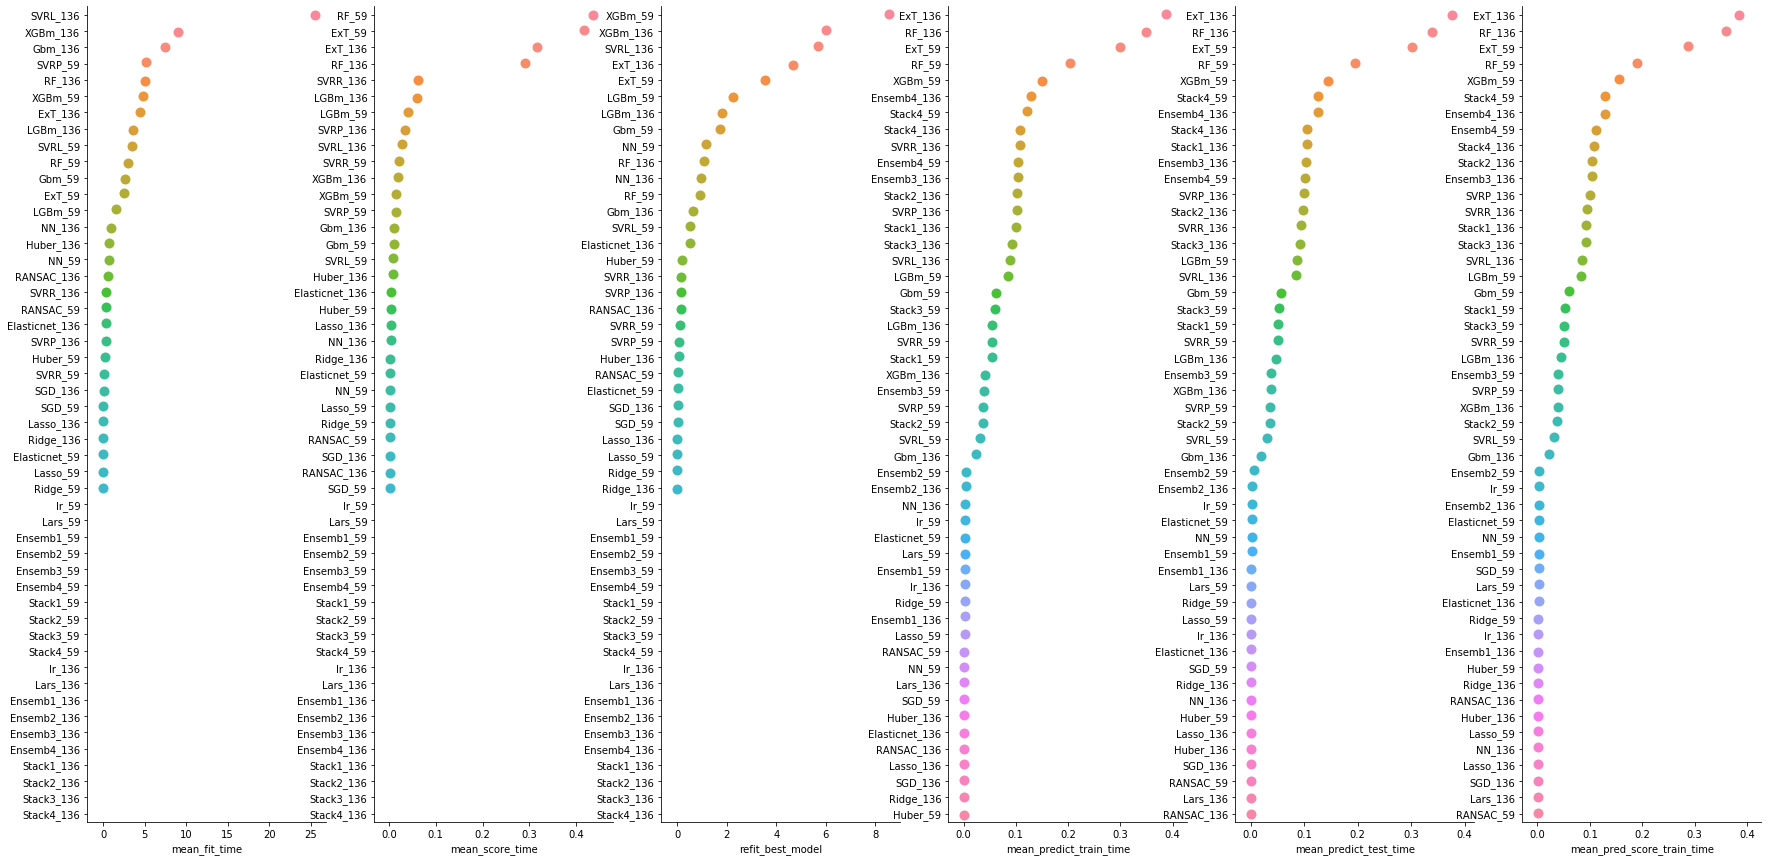

In [12]:
fig, ax = plt.subplots(1, 6, figsize=(30, 15))

for ind in range(0, timerDF.shape[1]):
    temp = timerDF.iloc[:, ind].sort_values(ascending=False)
    sns.stripplot(x=temp, y=temp.index, ax=ax[ind], size=10)
    ax[ind].spines['right'].set_visible(False)
    ax[ind].spines['top'].set_visible(False)

Se predentan los 10 mejores modelos según variable.

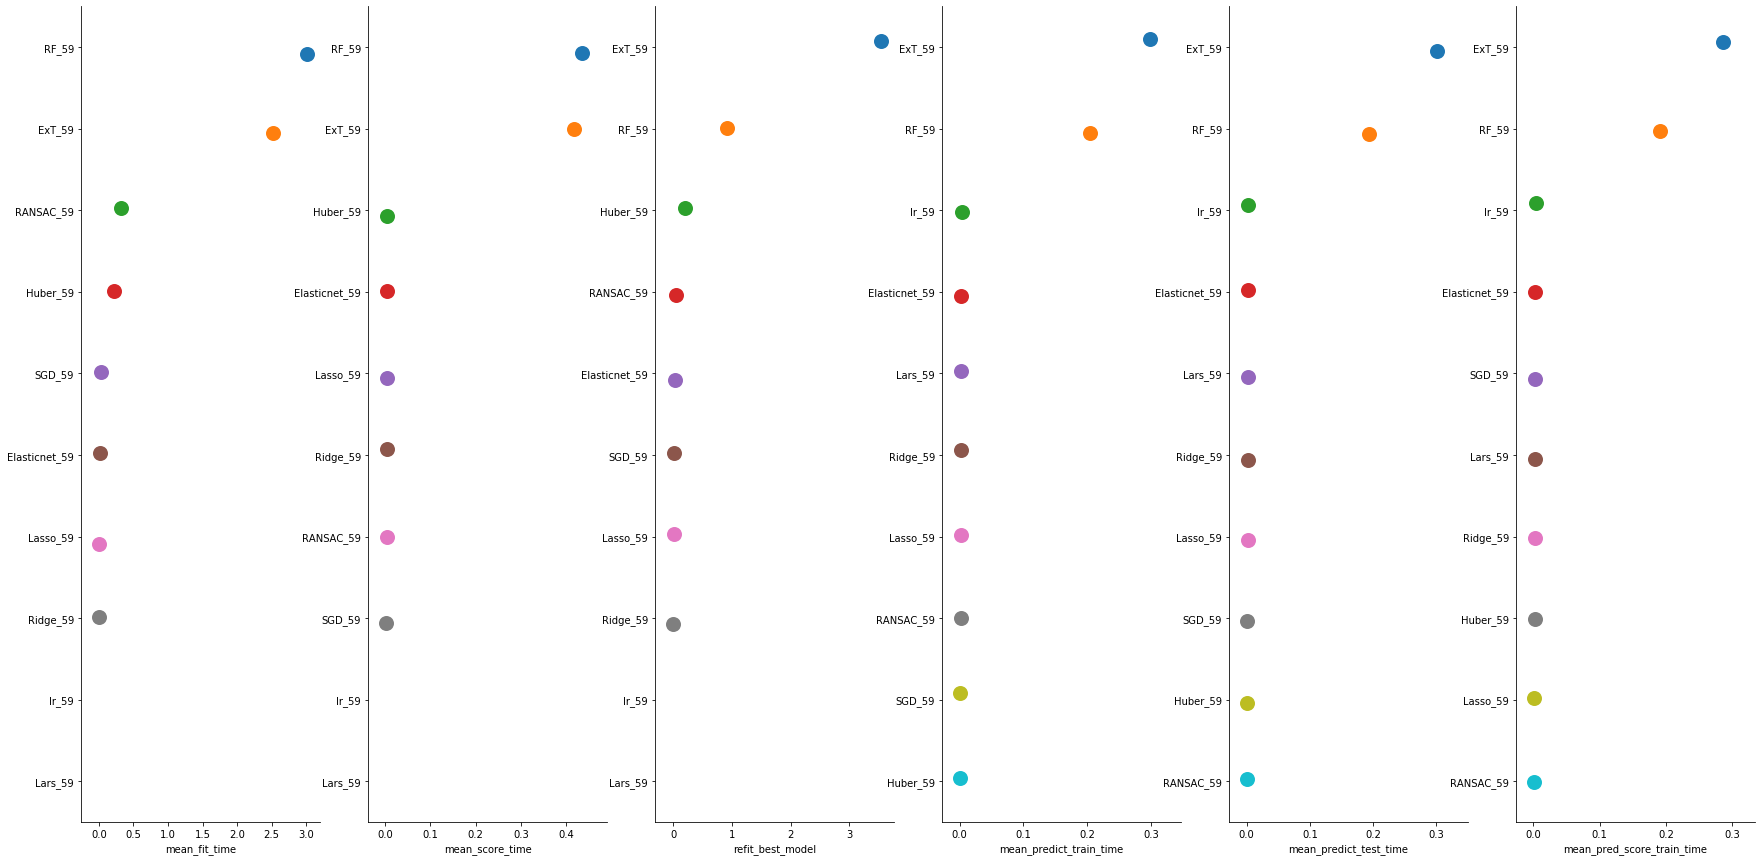

In [13]:
fig, ax = plt.subplots(1, 6, figsize=(30, 15))

for ind in range(0, timerDF.shape[1]):
    temp = timerDF.iloc[:10, ind].sort_values(ascending=False)
    sns.stripplot(x=temp, y=temp.index, ax=ax[ind], size=15)
    ax[ind].spines['right'].set_visible(False)
    ax[ind].spines['top'].set_visible(False)

# Ranking DataSets

Se crean los dataframes de cada uno de los datasets y se funden en uno sólo.

In [14]:
rankDF59 = pd.DataFrame(rank59dict)
rankDF59.index = [ind + "_59" for ind in rankDF59.index]

rankDF136 = pd.DataFrame(rank136dict)
rankDF136.index = [ind + "_136" for ind in rankDF136.index]

rankDF = pd.concat([rankDF59, rankDF136])[["Mediana", "Media", "Std"]]

Sobre el dataframe creado, se generan los gráficos de tiempo ordenados según el campo determinado.

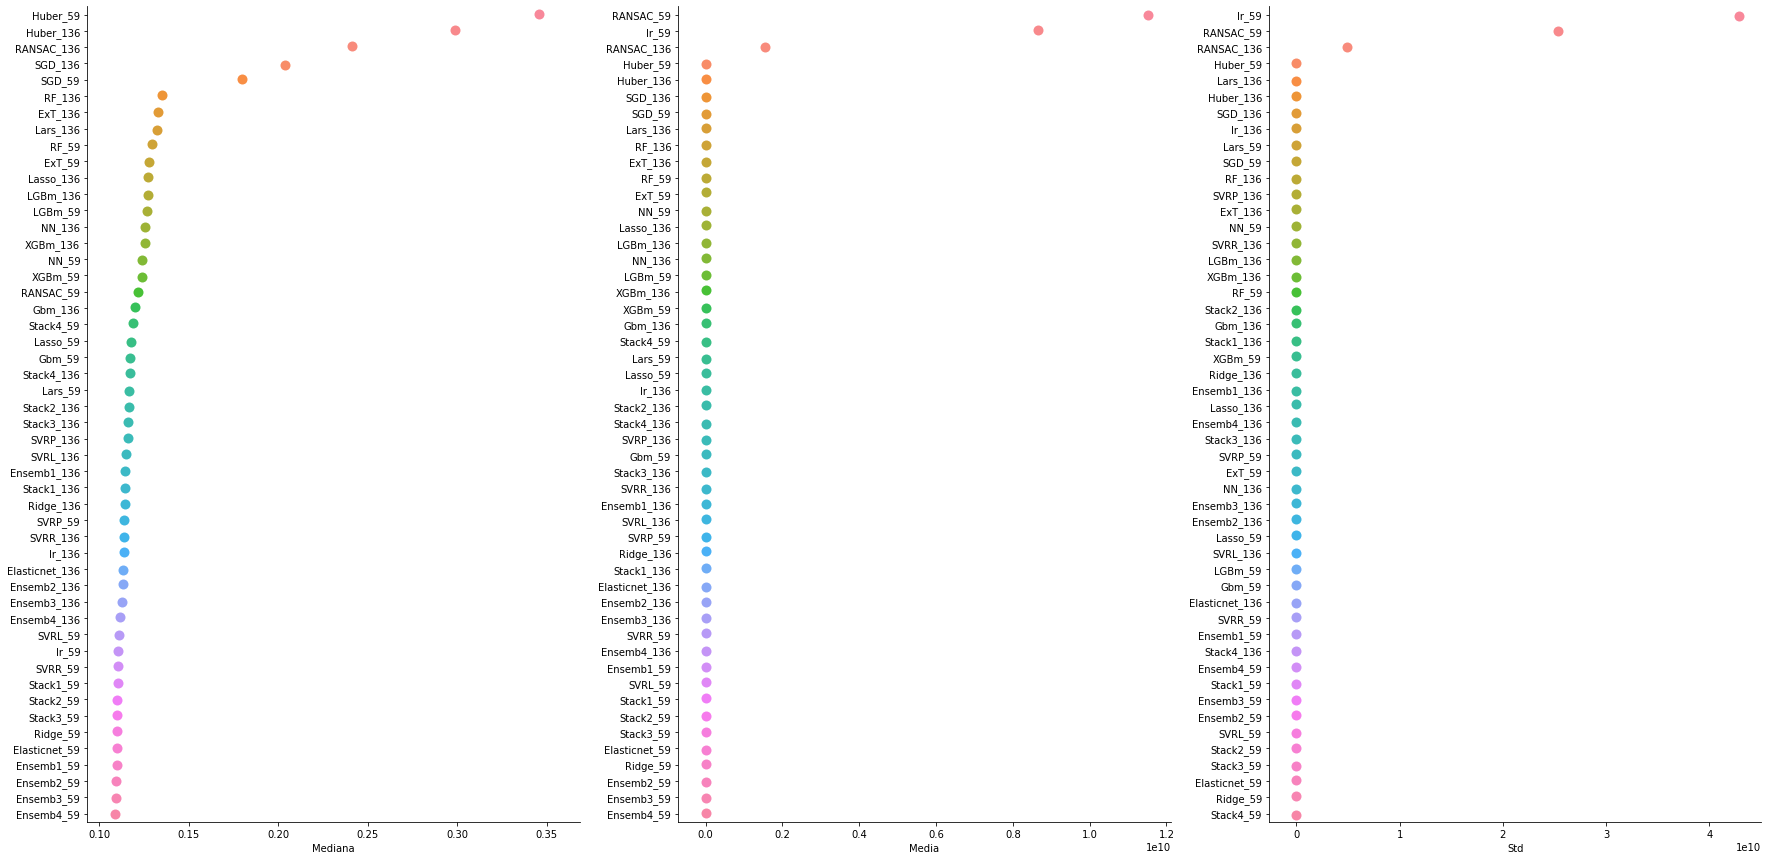

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(30, 15))

for ind in range(0, rankDF.shape[1]):
    temp = rankDF.iloc[:, ind].sort_values(ascending=False)
    sns.stripplot(x=temp, y=temp.index, ax=ax[ind], size=10)
    ax[ind].spines['right'].set_visible(False)
    ax[ind].spines['top'].set_visible(False)

Se predentan los 10 mejores modelos según variable.

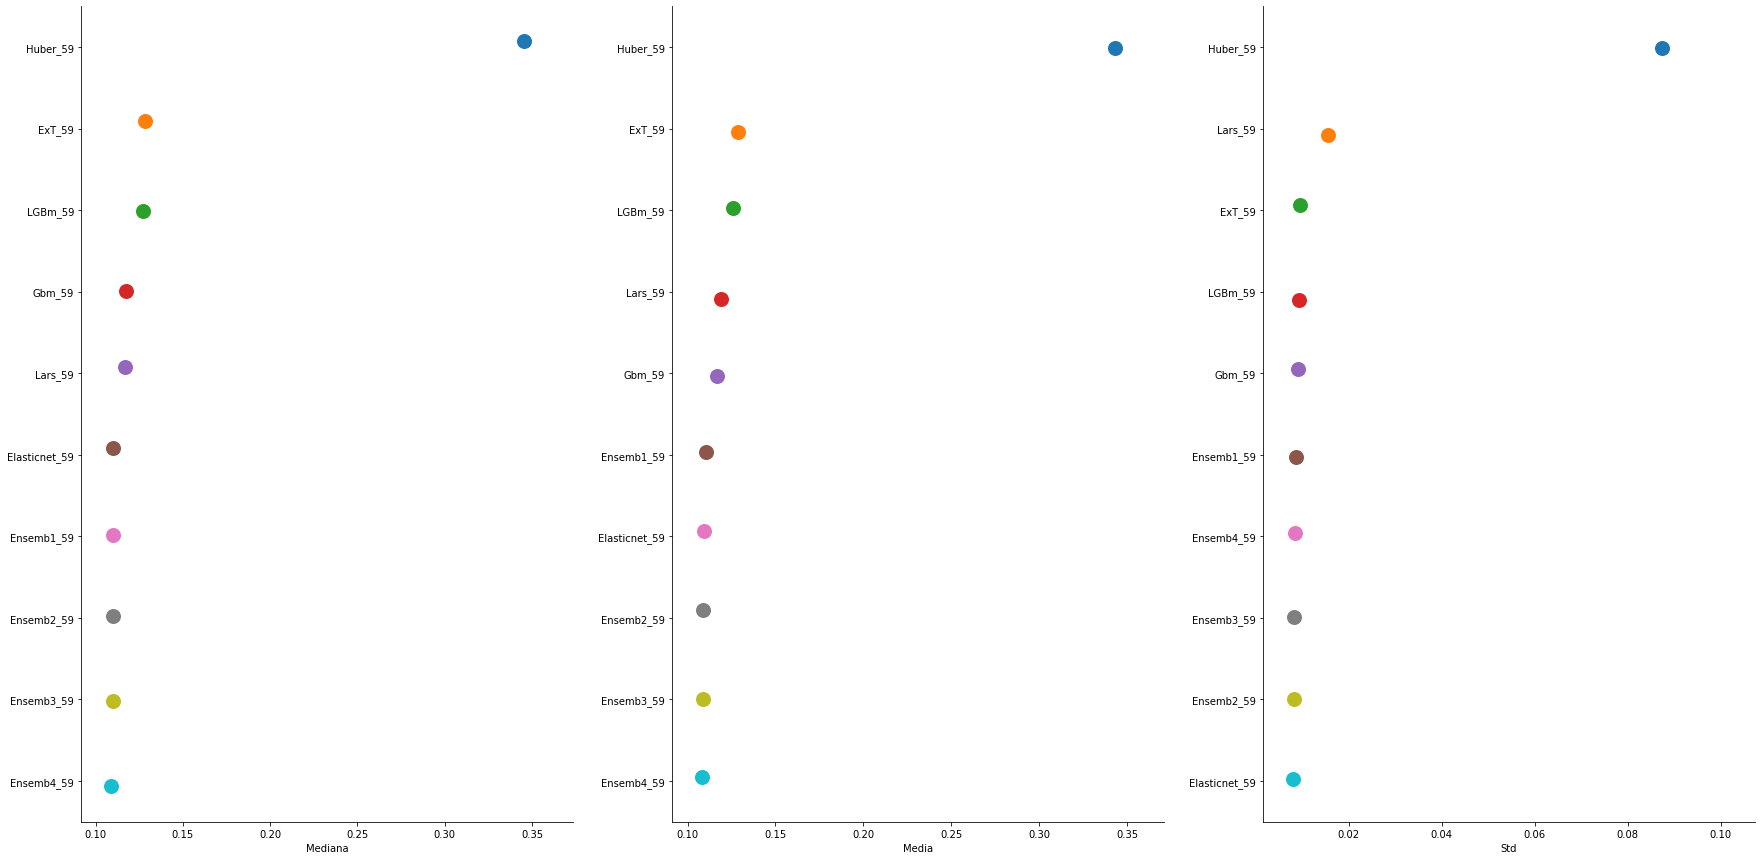

In [16]:
fig, ax = plt.subplots(1, 3, figsize=(30, 15))

for ind in range(0, rankDF.shape[1]):
    temp = rankDF.iloc[:10, ind].sort_values(ascending=False)
    sns.stripplot(x=temp, y=temp.index, ax=ax[ind], size=15)
    ax[ind].spines['right'].set_visible(False)
    ax[ind].spines['top'].set_visible(False)

# Conclusión

En vista de resultados del RMSE y de los tiempos y estadísticas medias, se cree recomendable seguir trabajando con el set de datos consistente en 59 variables que se ha obtenido por medio de la aplicación de métodos **embedded** en la selección de variables.